### **Regrex**

Regex gr[ea]y digunakan untuk mencocokkan dua kata: grey dan gray. Penjelasannya:

gr: Bagian ini mencocokkan huruf gr di awal kata.
[ea]: Bagian ini adalah character set (set karakter) yang berarti bisa cocok dengan salah satu dari dua huruf: e atau a.
y: Bagian ini mencocokkan huruf y di akhir kata.
Jadi, gr[ea]y mencocokkan:

grey (menggunakan "e")
gray (menggunakan "a")
Tetapi tidak cocok dengan:

grAy (karena "A" huruf besar, regex ini peka huruf besar-kecil).
graay (ada dua "a").
graey (ada huruf tambahan "e" di antara "a" dan "y").
Regex ini dirancang hanya untuk grey atau gray saja.

In [2]:
import pandas as pd
import re
# DataFrame contoh
data = {'text': ['I prefer grey color.',
                 'The sky looks gray today.',
                 'graey is not valid.',
                 'grAy is a different spelling.',
                 'I love both grey and gray.']}
df = pd.DataFrame(data)

pattern = r"gr[ea]y"
df['matches'] = df['text'].str.contains(pattern, regex=True)

# Ekstrak kata yang sesuai pola
df['extracted'] = df['text'].str.extract(f"({pattern})")
df

,text,matches,extracted
0,I prefer grey color.,True,grey
1,The sky looks gray today.,True,gray
2,graey is not valid.,False,NaN
3,grAy is a different spelling.,False,NaN
4,I love both grey and gray.,True,grey


**.str.contains():**

    Mengembalikan nilai True atau False untuk setiap baris berdasarkan apakah pola cocok atau tidak.
**.str.extract():**

    Mengekstrak teks yang cocok dengan regex dan menampilkannya di kolom baru.
    
**NaN:** 
    Ditampilkan jika tidak ada kecocokan untuk baris tersebut.

#### **Regrex Contoh Plat Mobil Luar**

Untuk mencocokkan nomor plat mobil seperti XRA 000 atau 1AA 1AA, kita dapat membuat regex yang mencakup pola berikut:

Tiga huruf atau angka pertama: Bisa berupa huruf (A-Z) atau angka (0-9).

Spasi: Harus ada satu spasi.

Tiga huruf atau angka terakhir: Sama seperti sebelumnya, bisa berupa huruf (A-Z) atau angka (0-9).

Regrexnya adalah: **\b[A-Z0-9]{3} [A-Z0-9]{3}\b**

**Penjelasan Regex**

    1. [A-Z0-9]{3}: Mencocokkan tiga karakter yang bisa berupa huruf besar (A-Z) atau angka (0-9).

    2. Spasi ( ): Memastikan ada satu spasi di antara dua bagian.

    3. \b: Awal dan akhir kata untuk memastikan pencocokan yang spesifik.
    
    4. Pola ini hanya cocok dengan format 3 huruf/angka + spasi + 3 huruf/angka.

In [3]:
data = {'text': ['XRA 000', '1AA 1AA', '50B Z99', 'ABC 123', 'invalid123', '123 ABC']}
df = pd.DataFrame(data)
pattern = r'\b[A-Z0-9]{3} [A-Z0-9]{3}\b'

# Cari kecocokan
df['matches'] = df['text'].str.contains(pattern, regex=True)

# Ekstrak plat nomor yang cocok
df['extracted'] = df['text'].str.extract(f'({pattern})')
df


,text,matches,extracted
0,XRA 000,True,XRA 000
1,1AA 1AA,True,1AA 1AA
2,50B Z99,True,50B Z99
3,ABC 123,True,ABC 123
4,invalid123,False,NaN
5,123 ABC,True,123 ABC


**Jika Plat Indonesia**

    Plat nomor kendaraan di Indonesia memiliki format umum seperti:
    [KODE_WILAYAH] [ANGKA] [HURUF_SERI]
    Misalnya: B 1234 ABC, D 45 XY, atau AB 123 CD.

**Regex untuk Plat Nomor Indonesia: \b[A-Z]{1,2} [0-9]{1,4} [A-Z]{1,3}\b**

    1. \b: Awal dan akhir kata untuk memastikan pencocokan penuh.

    2. [A-Z]{1,2}: Kode wilayah berupa 1 atau 2 huruf (misalnya, B, D, AB).

    3. [0-9]{1,4}: Angka 1 hingga 4 digit.

    4. [A-Z]{1,3}: Huruf seri berupa 1 hingga 3 huruf (misalnya, A, BC, XYZ).



In [4]:
# DataFrame contoh
data = {
    'text': ['B 1234 ABC ini mobil saya', 'D 45 XY ini mobil tetangga', 'AB 123 CD ini mobil ayah', 'C 12345 maling!', 'invalid123', '123 B XYZ']
}
df = pd.DataFrame(data)
# Pola regex
pattern = r'\b[A-Z]{1,2} [0-9]{1,4} [A-Z]{1,3}\b'

# Cari kecocokan
df['matches'] = df['text'].str.contains(pattern, regex=True)
# Ekstrak plat nomor yang sesuai pola
df['extracted'] = df['text'].str.extract(f'({pattern})')
df

,text,matches,extracted
0,B 1234 ABC ini mobil saya,True,B 1234 ABC
1,D 45 XY ini mobil tetangga,True,D 45 XY
2,AB 123 CD ini mobil ayah,True,AB 123 CD
3,C 12345 maling!,False,NaN
4,invalid123,False,NaN
5,123 B XYZ,False,NaN


**Regular Expression untuk Mencocokkan Hanya Hewan Hidup (hog, dog)**

**Regrex: [^b]og**
Penjelasan Regex

1. [^b]: ^ di dalam tanda kurung siku [] menunjukkan negasi. [b] berarti karakter selain b akan cocok.
2. og: Diikuti oleh literal "og", sehingga pola mencocokkan kata yang tidak diawali dengan huruf b, tetapi berakhiran "og".

Regex ini akan mencocokkan hog dan dog, tetapi tidak akan mencocokkan bog.

In [5]:
data = {'animals': ['hog', 'dog', 'bog','frog']}
df = pd.DataFrame(data)

# Pola regex
pattern = r'[^b]og'

# Cari kecocokan
df['matches'] = df['animals'].str.contains(pattern, regex=True)

# Ekstrak hewan yang cocok
df['extracted'] = df['animals'].str.extract(f'({pattern})')
df


,animals,matches,extracted
0,hog,True,hog
1,dog,True,dog
2,bog,False,NaN
3,frog,True,rog


**Daftar Shorthand Regex**

**1. \d**

    Arti: Mewakili digit (angka 0-9).

    Setara dengan: [0-9]

    Contoh:

    Regex: \d

    Cocok dengan: 1, 5, 9
    
    Tidak cocok dengan: a, !, Z

In [6]:
data = {'text': ['cat', '123', 'hello world', '  space', 'no_space!', 'newline\n','123abc456!@#','    ']}
df = pd.DataFrame(data)
df['contains_digit'] = df['text'].str.contains(r'\d', regex=True)
df



,text,contains_digit
0,cat,False
1,123,True
2,hello world,False
3,space,False
4,no_space!,False
5,newline\n,False
6,123abc456!@#,True
7,,False


**2.Mencocokkan teks yang mengandung whitespace (\s)**

In [7]:
df['contains_whitespace'] = df['text'].str.contains(r'\s', regex=True)
df

,text,contains_digit,contains_whitespace
0,cat,False,False
1,123,True,False
2,hello world,False,True
3,space,False,True
4,no_space!,False,False
5,newline\n,False,True
6,123abc456!@#,True,False
7,,False,True


**3.Mencocokkan hanya word character (\w)**

In [8]:
df['contains_word_char'] = df['text'].str.contains(r'\w', regex=True)
df


,text,contains_digit,contains_whitespace,contains_word_char
0,cat,False,False,True
1,123,True,False,True
2,hello world,False,True,True
3,space,False,True,True
4,no_space!,False,False,True
5,newline\n,False,True,True
6,123abc456!@#,True,False,True
7,,False,True,False


**4. **`\D`**: Mencocokkan semua karakter **bukan angka** (kebalikan dari `\d`).**
- **`\d`** mencocokkan karakter angka (digit 0-9).
- **`\D`** mencocokkan semua karakter selain angka.

In [9]:
df['contains_character_non_number'] = df['text'].str.contains(r'\D', regex=True)
df

,text,contains_digit,contains_whitespace,contains_word_char,contains_character_non_number
0,cat,False,False,True,True
1,123,True,False,True,False
2,hello world,False,True,True,True
3,space,False,True,True,True
4,no_space!,False,False,True,True
5,newline\n,False,True,True,True
6,123abc456!@#,True,False,True,True
7,,False,True,False,True


**5. \S: Mencocokkan semua karakter bukan spasi (kebalikan dari \s).**

- **\s** mencocokkan spasi, tab, dan karakter whitespace lainnya.
- **\S** mencocokkan semua karakter selain spasi.

In [10]:
df['contains_character_without_space'] = df['text'].str.contains(r'\S', regex=True)
df

,text,contains_digit,contains_whitespace,contains_word_char,contains_character_non_number,contains_character_without_space
0,cat,False,False,True,True,True
1,123,True,False,True,False,True
2,hello world,False,True,True,True,True
3,space,False,True,True,True,True
4,no_space!,False,False,True,True,True
5,newline\n,False,True,True,True,True
6,123abc456!@#,True,False,True,True,True
7,,False,True,False,True,False


In [ ]:
data = {'text' : ['oops', 'ooops', 'oooops', 'oooooops']}
df = pd.DataFrame(data)
df['regex_+'] = df['text'].str.contains(r'ooo+ps',regex=True)
df['regex_*'] = df['text'].str.contains(r'ooo*ps',regex=True)


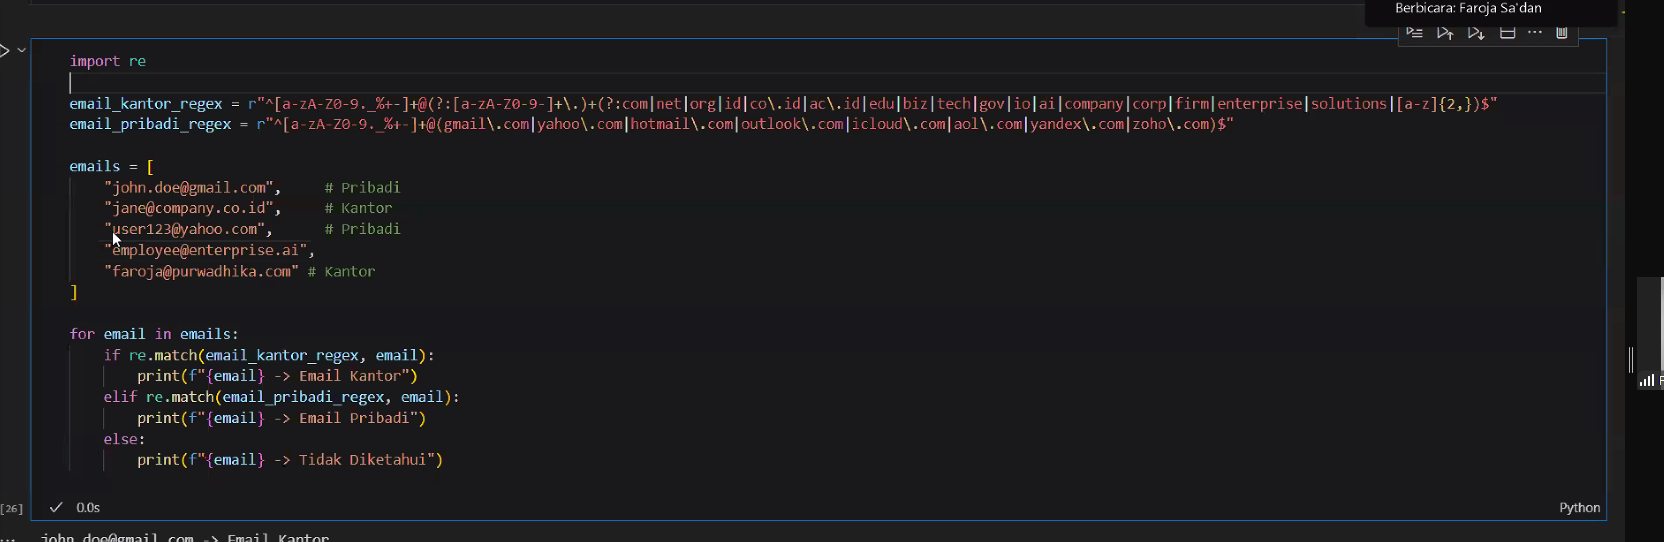
